In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

data_dir = '/content/drive/MyDrive/data'

# List all classes (folder names)
classes = sorted(os.listdir(data_dir))
print(f"Found {len(classes)} classes: {classes}")


Found 106 classes: ['dataset.xlsx', 'pins_Adriana Lima', 'pins_Alex Lawther', 'pins_Alexandra Daddario', 'pins_Alvaro Morte', 'pins_Amanda Crew', 'pins_Andy Samberg', 'pins_Anne Hathaway', 'pins_Anthony Mackie', 'pins_Avril Lavigne', 'pins_Ben Affleck', 'pins_Bill Gates', 'pins_Bobby Morley', 'pins_Brenton Thwaites', 'pins_Brian J. Smith', 'pins_Brie Larson', 'pins_Chris Evans', 'pins_Chris Hemsworth', 'pins_Chris Pratt', 'pins_Christian Bale', 'pins_Cristiano Ronaldo', 'pins_Danielle Panabaker', 'pins_Dominic Purcell', 'pins_Dwayne Johnson', 'pins_Eliza Taylor', 'pins_Elizabeth Lail', 'pins_Emilia Clarke', 'pins_Emma Stone', 'pins_Emma Watson', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil', 'pins_Hugh Jackman', 'pins_Inbar Lavi', 'pins_Irina Shayk', 'pins_Jake Mcdorman', 'pins_Jason Momoa', 'pins_Jennifer Lawrence', 'pins_Jeremy Renner', 'pins_Jessica Barden', 'pins_Jimmy Fallon', 'pins_Johnny Depp', 'pins_Josh Radnor', 'pins_Katharine Mcphee', 'pins_Katherine Langford', 'pins_Keanu Reev

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# used to supress display of warnings
import warnings

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
# suppress display of warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import numpy as np

class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        identity_path = os.path.join(path, i)
        # Skip if not a directory (ignore files like .xlsx)
        if not os.path.isdir(identity_path):
            continue
        for f in os.listdir(identity_path):
            ext = os.path.splitext(f)[1].lower()
            if ext in ['.jpg', '.jpeg']:  # add '.png', '.bmp' here if needed
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata(data_dir)


In [ ]:
print('metadata shape :', metadata.shape)

metadata shape : (15478,)


In [ ]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

array([[[192, 191, 199],
        [195, 194, 202],
        [196, 195, 203],
        ...,
        [170, 169, 177],
        [169, 168, 176],
        [168, 167, 175]],

       [[194, 193, 201],
        [196, 195, 203],
        [196, 195, 203],
        ...,
        [170, 169, 177],
        [169, 168, 176],
        [168, 167, 175]],

       [[195, 194, 202],
        [197, 196, 204],
        [197, 196, 204],
        ...,
        [170, 169, 177],
        [168, 167, 175],
        [168, 167, 175]],

       ...,

       [[ 26,  24,  37],
        [ 14,  12,  25],
        [ 16,  14,  27],
        ...,
        [ 28,  27,  43],
        [ 27,  26,  42],
        [ 26,  25,  41]],

       [[ 22,  20,  33],
        [ 23,  21,  34],
        [ 20,  18,  31],
        ...,
        [ 28,  27,  43],
        [ 27,  26,  42],
        [ 26,  25,  41]],

       [[ 19,  17,  30],
        [ 24,  22,  35],
        [ 26,  24,  37],
        ...,
        [ 28,  27,  43],
        [ 27,  26,  42],
        [ 26,  25,  41]]], dtype=uint8)
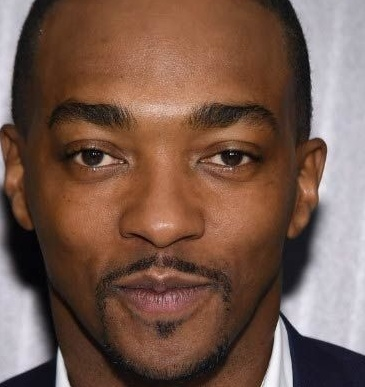

In [ ]:
load_image('/content/drive/MyDrive/data/pins_Anthony Mackie/Anthony Mackie152_468.jpg')

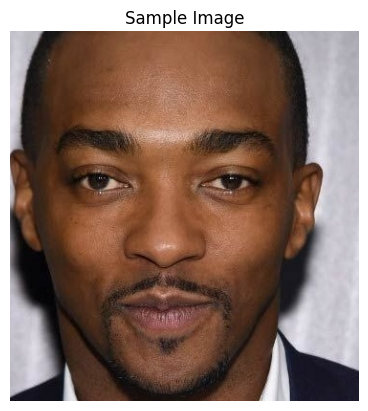

Embedding shape: 4096


In [ ]:
# Step 1: Install DeepFace
!pip install deepface --quiet

# Step 2: Import required libraries
from deepface import DeepFace
import os
import cv2
import matplotlib.pyplot as plt

# Step 3: Load and display a sample image
img_path = '/content/drive/MyDrive/data/pins_Anthony Mackie/Anthony Mackie152_468.jpg'  # change path

img = cv2.imread(img_path)[..., ::-1]
plt.imshow(img)
plt.axis('off')
plt.title("Sample Image")
plt.show()

# Step 4: Generate face embeddings (no need for model or weights)
embedding = DeepFace.represent(img_path=img_path, model_name='VGG-Face', enforce_detection=False)[0]["embedding"]
print("Embedding shape:", len(embedding))


In [ ]:
import glob

image_paths = glob.glob('/content/drive/MyDrive/data/**/*.jpg', recursive=True)


In [ ]:
from deepface import DeepFace
import numpy as np
from tqdm import tqdm
import glob

image_paths = glob.glob('/content/drive/MyDrive/data/**/*.jpg', recursive=True)

embedding_size = 4096  # VGG-Face output vector size, default DeepFace uses 4096 features
total_images = len(image_paths)
embeddings = np.zeros((total_images, embedding_size))

for i, img_path in enumerate(tqdm(image_paths)):
    try:
        emb = DeepFace.represent(img_path=img_path, model_name='VGG-Face', enforce_detection=False)[0]["embedding"]
        embeddings[i] = np.array(emb)
    except Exception as e:
        print(f"Error for {img_path}: {e}")
        embeddings[i] = np.zeros(embedding_size)

print("Embeddings shape:", embeddings.shape)


100%|██████████| 15478/15478 [2:11:08<00:00,  1.97it/s]

Embeddings shape: (15478, 4096)


In [ ]:
print(embeddings[0][:10])  # print first 10 values of the first embedding
print(embeddings[-1][:10])  # print first 10 values of the last embedding


[0.         0.         0.         0.         0.         0.
 0.         0.         0.03565959 0.        ]
[0.         0.01543115 0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [ ]:
import os

labels = [os.path.basename(os.path.dirname(p)).replace("pins_", "") for p in image_paths]

# Save to disk
np.save('embeddings.npy', embeddings)
np.save('labels.npy', labels)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Encode labels as integers
le = LabelEncoder()
y = le.fit_transform(labels)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)

# Train SVM classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [ ]:
# Test accuracy
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9282945736434108
